In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

url=("https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv")

df=pd.read_csv(url)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547060 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     547060 non-null  object 
 1   date                                        547060 non-null  object 
 2   total_cases                                 533856 non-null  float64
 3   new_cases                                   530308 non-null  float64
 4   new_cases_smoothed                          529099 non-null  float64
 5   total_cases_per_million                     533856 non-null  float64
 6   new_cases_per_million                       530308 non-null  float64
 7   new_cases_smoothed_per_million              529099 non-null  float64
 8   total_deaths                                533856 non-null  float64
 9   new_deaths                                  531235 non-null  float64
 

In [1]:
#verifichiamo se ci sono nulli in continent
df["continent"].value_counts(dropna= False)

NameError: name 'df' is not defined

In [41]:
#eliminiamo i nan 
df=df.dropna(subset="continent",how= "any")
df

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [42]:
#verichiamo se è rimasto qualche refuso
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [43]:
#EDA
#stampiamo le prime 5 righe
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [44]:
#con info vediamo se ci sono null e vediamo il tipo di dati per ogni colonna
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 506100 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     506100 non-null  object 
 1   date                                        506100 non-null  object 
 2   total_cases                                 499552 non-null  float64
 3   new_cases                                   496004 non-null  float64
 4   new_cases_smoothed                          494875 non-null  float64
 5   total_cases_per_million                     499552 non-null  float64
 6   new_cases_per_million                       496004 non-null  float64
 7   new_cases_smoothed_per_million              494875 non-null  float64
 8   total_deaths                                499552 non-null  float64
 9   new_deaths                                  496931 non-null  float64
 10  n

In [45]:
#analisi delle colonne numeriche
descrizione_numeriche =df.describe()
descrizione_numeriche

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,4.995520e+05,4.960040e+05,4.948750e+05,499552.000000,496004.000000,494875.000000,4.995520e+05,496931.000000,495799.000000,499552.000000,...,5.038840e+05,495303.000000,503884.000000,503884.000000,414482.000000,348547.000000,448831.000000,239528.000000,320255.000000,0.0
mean,2.166270e+06,1.570308e+03,1.573951e+03,134658.372881,97.856180,98.083458,2.272342e+04,14.305829,14.340799,929.639267,...,3.409526e+07,394.519417,31.197432,73.451333,22451.214658,14.053691,9.070109,59.050622,3.173928,NaN
std,8.803985e+06,3.167812e+04,2.848630e+04,179260.096334,994.393786,511.949029,8.917708e+04,136.448600,104.927069,1198.493322,...,1.367616e+08,1763.364780,9.719990,7.721966,22646.362947,20.886903,5.304180,32.137784,2.592275,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,18.817699,708.178284,0.000000,1.100000,3.440189,0.300000,NaN
25%,8.203000e+03,0.000000e+00,0.000000e+00,2988.458500,0.000000,0.000000,6.200000e+01,0.000000,0.000000,36.252007,...,3.847020e+05,38.660870,22.243999,68.748703,5155.620117,0.444097,5.600000,25.097641,1.320000,NaN
50%,6.725900e+04,0.000000e+00,2.142857e+00,48190.241000,0.000000,0.480796,8.450000e+02,0.000000,0.000000,381.259825,...,5.456796e+06,95.323570,31.683001,74.695999,14462.936523,2.718295,7.400000,70.153603,2.570000,NaN
75%,7.032280e+05,2.400000e+01,9.500000e+01,209133.530000,3.917729,26.421799,8.718000e+03,0.000000,0.857143,1479.503600,...,2.250904e+07,245.013458,39.080002,79.044800,34663.496094,21.365259,11.300000,88.469353,4.200000,NaN
max,1.034368e+08,6.966046e+06,5.882128e+06,769806.800000,230762.550000,37463.746000,1.228289e+06,44047.000000,6829.714400,6603.648000,...,1.425423e+09,21344.242188,59.875000,85.746399,117746.992188,85.317673,30.799999,100.000000,13.800000,NaN


In [46]:
#vediamo quanti nulli ci sono per ogni colonna
df.isna().sum()

country                            0
date                               0
total_cases                     6548
new_cases                      10096
new_cases_smoothed             11225
                               ...  
extreme_poverty               157553
diabetes_prevalence            57269
handwashing_facilities        266572
hospital_beds_per_thousand    185845
human_development_index       506100
Length: 61, dtype: int64

In [47]:
df.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [48]:
#vediamo la dimensione del dataset dopo averlo pulito
df.shape

(506100, 61)

In [50]:
# Si chiede di trovare, per ogni continente: il numero di casi fin dall'inizio della pandemia
df.groupby("continent")["new_cases"].sum()

continent
Africa            13065161.0
Asia             302240021.0
Europe           254760932.0
North America    124517132.0
Oceania           15033101.0
South America     69262711.0
Name: new_cases, dtype: float64

In [51]:
# la percentuale rispetto al totale mondiale del numero di casi

totale_mondiale= df["new_cases"].sum()
casi_per_continenti=df.groupby("continent")["new_cases"].sum()

percentuale=(casi_per_continenti/totale_mondiale) * 100

percentuale.round(2)


continent
Africa            1.68
Asia             38.80
Europe           32.71
North America    15.99
Oceania           1.93
South America     8.89
Name: new_cases, dtype: float64

In [52]:
# Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni
#per prima cosa trasformiamo la data in data
df["date"]=pd.to_datetime(df["date"],yearfirst= True)
#abbiamo filtrato per l'italia,per l'anno 2022 e filtrato via i giorni senza dati
italy_2022= df[(df["country"] == "Italy") & (df["date"].dt.year == 2022) & (df["total_cases"].notna())]

                                          
italy_2022

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
235100,Italy,2022-01-01,6125683.0,144255.0,79719.860,102746.98,2419.61040,1337.1528,137402.0,155.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235101,Italy,2022-01-02,6267035.0,141352.0,92086.290,105117.90,2370.91770,1544.5768,137513.0,111.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235102,Italy,2022-01-03,6328076.0,61041.0,97251.860,106141.74,1023.84960,1631.2196,137646.0,133.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235103,Italy,2022-01-04,6396110.0,68034.0,102571.140,107282.89,1141.14430,1720.4408,137786.0,140.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235104,Italy,2022-01-05,6566947.0,170837.0,115790.710,110148.37,2865.47400,1942.1746,138045.0,259.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235460,Italy,2022-12-27,25081005.0,4528.0,18302.572,420687.38,75.94881,306.9917,184248.0,36.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235461,Italy,2022-12-28,25089327.0,8322.0,15423.571,420826.97,139.58612,258.7018,184324.0,76.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235462,Italy,2022-12-29,25119088.0,29761.0,16720.857,421326.16,499.18560,280.4614,184528.0,204.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235463,Italy,2022-12-30,25143705.0,24617.0,17442.715,421739.06,412.90454,292.5692,184642.0,114.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN


<Axes: title={'center': 'Italy – Total Cases 2022'}, xlabel='date'>

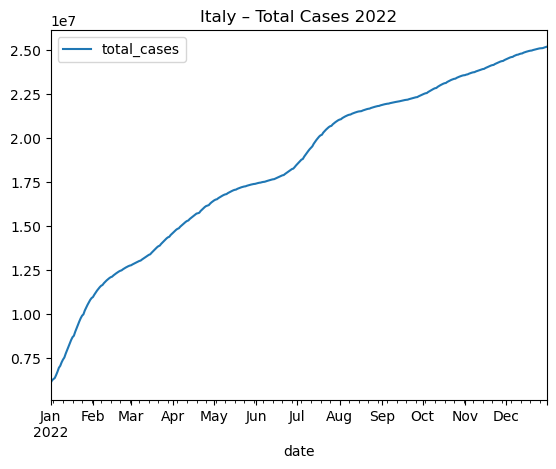

In [53]:
# l'evoluzione del casi totali dall'inizio alla fine dell'anno

italy_2022.plot(x="date",y="total_cases",title="Italy – Total Cases 2022")

<Axes: title={'center': 'Italy – New Daily Cases 2022'}, xlabel='date'>

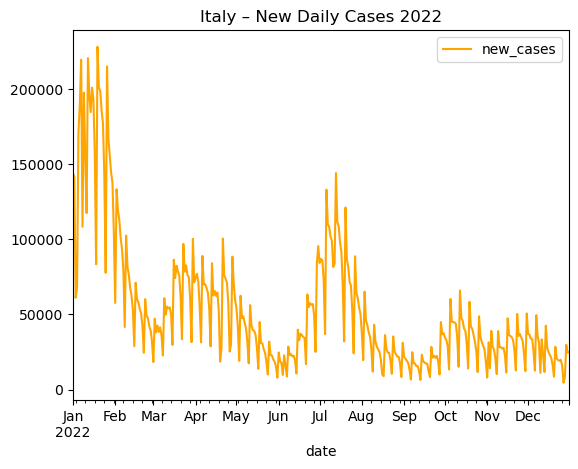

In [54]:
# il numero di nuovi casi rispetto alla data

italy_2022.plot(x="date",y="new_cases", title="Italy – New Daily Cases 2022",color="orange")

<Axes: xlabel='country', ylabel='icu_patients'>

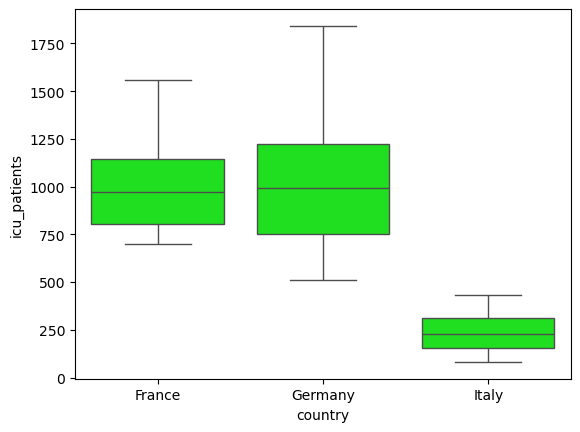

In [55]:
# Riguardo le nazioni di Italia, Germania e Francia:
#  mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti 
# in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients)
# da maggio 2022 (incluso) ad aprile 2023 (incluso)

df_country = df[
    (df["country"] == "Italy") |
    (df["country"] == "Germany") |
    (df["country"] == "France")]

df_periodo = df_country[((df_country["date"].dt.year == 2022) & (df_country["date"].dt.month >= 5)) |
                        ((df_country["date"].dt.year == 2023) & (df_country["date"].dt.month <= 4))]

df_periodo = df_periodo[df_periodo["icu_patients"].notna()]

sns.boxplot(data=df_periodo, x="country", y="icu_patients",color="lime")

In [ ]:
#possiamo notare da questo grafico che la Germania ha avuto molti giorni con numeri piu alti di pazienti in ICU, la Francia meno della germania ma anch'essa elevata,
#mentre l'italia si distigue avendo i numeri nettamente inferiori e piu tabili dei pazienti

365 valori nulli trovati
country
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


<Axes: title={'center': 'Pazienti ospedalizzati 2021'}, ylabel='country'>

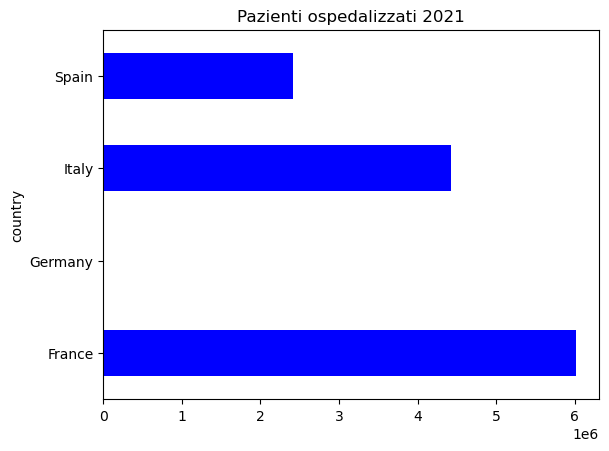

In [56]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: mostrare in maniera grafica oppure numerica,
# la somma dei pazienti ospitalizzati per ognuna(colonna hosp_patients).se ci sono dati nulli,
# con un breve commento scrivere se puo essere possibile gestirli tramite sostituzione o meno


df_country = df[
    (df["country"] == "Italy") |
    (df["country"] == "Germany") |
    (df["country"] == "France") |
    (df["country"] == "Spain")
]

df_2021 = df_country[df_country["date"].dt.year == 2021]

print(df_2021["hosp_patients"].isna().sum(), "valori nulli trovati")

somma_hosp = df_2021.groupby("country")["hosp_patients"].sum()
print(somma_hosp)

somma_hosp.plot(kind="barh",color="blue",title= "Pazienti ospedalizzati 2021")

In [ ]:
#Abbiamo 365 nulli, tutti questi in Germania,
# infatti in quell'anno OWID non ha potuto riempire i dati essendo che quell'anno la germania non li ha aggiornati